In [52]:
# copy from coinmarketcap but change the API key

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b89d5f3a-8c22-44ef-a966-029b94d6ae84',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-02-06T23:53:33.335Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 10826}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11928, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [53]:
# the above is in json format

type(data)

dict

In [54]:
# change to a usable state using pandas

import pandas as pd

pd.set_option('display.max_columns', None)

In [55]:
df = pd.DataFrame()

In [56]:
df = pd.json_normalize(data['data'])

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19820662.00000,19820662.00000,False,NaN,1,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,96433.06555,46002595760.83913,-6.69330,-0.05792,-0.10495,-8.05864,-0.52229,-4.67584,26.00057,1911367197909.57959,60.98630,2025094376570.33008,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120528602.25268,120528602.25268,True,NaN,2,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,2680.60461,30412578787.39413,-6.51570,-0.37123,-3.84248,-17.56474,-20.69906,-33.12920,-9.40589,323089526369.44073,10.31560,323089526369.44000,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,115710,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141166869194.86987,143570570332.88257,True,NaN,3,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,1.00009,99018710322.00703,-2.15580,-0.00507,0.00653,-0.00161,0.02545,-0.05844,-0.05215,141179129624.40213,4.50760,143583039525.34000,NaN,2025-02-06T23:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,2.31567,7289174056.28247,-5.76080,-0.60345,-2.87153,-26.18968,1.65414,-11.22372,317.86512,133759248845.79108,4.27070,231567441019.76999,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487148015.17972,593528604.30426,True,NaN,5,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,189.00644,3925130992.57760,2.24130,-1.14890,-3.59582,-21.08702,-6.67311,-20.32621,-5.48298,92074112274.13516,2.93970,112180728747.22000,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN
5,1839,BNB,BNB,bnb,2349,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480230.34000,142480230.34000,False,NaN,6,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,571.53047,1719975128.66157,15.36160,-1.05557,0.49453,-15.69606,-17.94432,-23.02216,-4.35082,81431793248.73384,2.60000,81431793248.73000,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,25524,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55751639315.76264,55751639315.76264,False,NaN,7,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,0.99997,9100240467.17682,-5.21270,-0.00036,0.00379,-0.01008,-0.00563,-0.00815,0.02973,55749932083.28419,1.78000,55749932083.28000,NaN,2025-02-06T23:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147939326383.70520,147939326383.70520,True,NaN,8,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,0.24713,1890267877.06149,3.80600,-0.89625,-3.51767,-25.52725,-29.12278,-47.03645,22.21279,36560678013.95655,1.16730,36560678013.96000,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,cardano,1458,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35193500774.44231,44995053982.60503,False,NaN,9,NaN

In [57]:
#we have the data above now from coinmarket cap. let us automate the process so we can get daily updates

# step 1 is add a time stamp so we know when the automation happens
# add the timestamp to a new column

df['timestamp'] = pd.Timestamp('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19820662.00000,19820662.00000,False,NaN,1,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,96433.06555,46002595760.83913,-6.69330,-0.05792,-0.10495,-8.05864,-0.52229,-4.67584,26.00057,1911367197909.57959,60.98630,2025094376570.33008,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:53:40.529598
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120528602.25268,120528602.25268,True,NaN,2,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,2680.60461,30412578787.39413,-6.51570,-0.37123,-3.84248,-17.56474,-20.69906,-33.12920,-9.40589,323089526369.44073,10.31560,323089526369.44000,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:53:40.529598
2,825,Tether USDt,USDT,tether,115710,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141166869194.86987,143570570332.88257,True,NaN,3,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,1.00009,99018710322.00703,-2.15580,-0.00507,0.00653,-0.00161,0.02545,-0.05844,-0.05215,141179129624.40213,4.50760,143583039525.34000,NaN,2025-02-06T23:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-07 00:53:40.529598
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,2.31567,7289174056.28247,-5.76080,-0.60345,-2.87153,-26.18968,1.65414,-11.22372,317.86512,133759248845.79108,4.27070,231567441019.76999,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:53:40.529598
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487148015.17972,593528604.30426,True,NaN,5,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,189.00644,3925130992.57760,2.24130,-1.14890,-3.59582,-21.08702,-6.67311,-20.32621,-5.48298,92074112274.13516,2.93970,112180728747.22000,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:53:40.529598
5,1839,BNB,BNB,bnb,2349,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480230.34000,142480230.34000,False,NaN,6,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,571.53047,1719975128.66157,15.36160,-1.05557,0.49453,-15.69606,-17.94432,-23.02216,-4.35082,81431793248.73384,2.60000,81431793248.73000,NaN,2025-02-06T23:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:53:40.529598
6,3408,USDC,USDC,usd-coin,25524,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55751639315.76264,55751639315.76264,False,NaN,7,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,0.99997,9100240467.17682,-5.21270,-0.00036,0.00379,-0.01008,-0.00563,-0.00815,0.02973,55749932083.28419,1.78000,55749932083.28000,NaN,2025-02-06T23:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-07 00:53:40.529598
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147939326383.70520,147939326383.70520,True,NaN,8,NaN,NaN,NaN,2025-02-06T23:51:00.000Z,0.24713,1890267877.06149,3.80600,-0.89625,-3.51767,-25.52725,-29.12278,-47.03645,22.21279,36560678013.95655,1.16730,36560678013.96000,NaN,2025-02-06T23:51:00.000Z

In [58]:
# create a function using the original script so it appends data

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'50',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b89d5f3a-8c22-44ef-a966-029b94d6ae84',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    
    df['timestamp'] = pd.Timestamp('now')
    
    df_append = pd.DataFrame(df)  
    
    df = pd.concat([df,df_append])
    
    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    if not os.path.isfile(r'C:\Users\EXPLOSIVE PRISCIIIII\Downloads\for python practice\CMCAPI.csv'):
        df.to_csv(r'C:\Users\EXPLOSIVE PRISCIIIII\Downloads\for python practice\CMCAPI.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\EXPLOSIVE PRISCIIIII\Downloads\for python practice\CMCAPI.csv', mode='a', header=False)
        
    #Then to read in the file: 
    

In [59]:
# script to automatically run the script. automate scripts
#the below give us ability to track time  in intervals that we want
import os 
from time import time
from time import sleep



In [60]:
for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()

{'status': {'timestamp': '2025-02-06T23:53:50.869Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 10826}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11928, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2025-02-06T23:54:56.639Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 10826}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11928, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [ ]:
df72 = pd.read_csv(r'C:\Users\EXPLOSIVE PRISCIIIII\Downloads\for python practice\CMCAPI.csv')
df72

In [61]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19820662.00000,19820662.00000,False,NaN,1,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,96553.98958,45288863655.20477,-7.98580,0.08410,0.05262,-7.88873,-0.41345,-4.68203,26.14057,1913763992160.19067,61.06910,2027633781120.12988,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120528602.25268,120528602.25268,True,NaN,2,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,2684.87283,29451771541.21430,-7.35500,-0.21991,-3.67675,-17.35074,-20.58081,-33.13549,-9.29975,323603969814.28857,10.32640,323603969814.28998,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
2,825,Tether USDt,USDT,tether,115710,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141166869194.86987,143570570332.88257,True,NaN,3,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,1.00007,98874666656.27184,-2.21040,-0.00030,0.00007,-0.00654,0.02268,-0.05388,-0.05099,141176052588.44049,4.50500,143579910095.53000,NaN,2025-02-06T23:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-07 00:54:57.191680
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,2.31743,7288305480.32230,-5.78100,-0.45061,-2.70203,-26.09939,1.74409,-11.20660,318.16915,133860552977.58308,4.27160,231742821330.04001,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487148015.17972,593528604.30426,True,NaN,5,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,189.13800,3931902294.37996,2.44890,-0.94351,-3.52616,-21.00486,-6.60708,-20.27876,-5.41241,92138201179.14423,2.94020,112258813019.67000,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,20396,Kaspa,KAS,kaspa,164,2022-06-01T00:03:58.000Z,"[mineable, dag, pow, store-of-value, polychain...",NaN,25686200129.37593,25686200129.37593,False,NaN,46,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,0.08246,117516996.22994,58.14960,-1.67289,-10.76832,-37.22925,-27.72939,-56.17917,-26.33021,2118017580.30081,0.06760,2118017580.30000,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
46,2280,Filecoin,FIL,filecoin,561,2017-12-13T00:00:00.000Z,"[mineable, ai-big-data, distributed-computing,...",NaN,628125194.00000,1959672642.00000,False,NaN,47,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,3.10676,177954515.01419,10.25910,-0.73456,-4.08429,-35.58799,-41.97466,-60.56628,-20.54166,1951433272.20109,0.06230,6088229596.19000,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
47,11841,Arbitrum,ARB,arbitrum,1090,2023-03-23T12:50:11.000Z,"[scaling, dao, dapp, ethereum-ecosystem, polyc...",NaN,4343862574.00000,10000000000.00000,False,NaN,48,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,0.44422,294732388.76599,10.97030,-0.94345,-5.52922,-29.

In [62]:
# a bit of data cleaning for the columns in scientific notation e^

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [63]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19820662.00000,19820662.00000,False,NaN,1,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,96553.98958,45288863655.20477,-7.98580,0.08410,0.05262,-7.88873,-0.41345,-4.68203,26.14057,1913763992160.19067,61.06910,2027633781120.12988,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120528602.25268,120528602.25268,True,NaN,2,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,2684.87283,29451771541.21430,-7.35500,-0.21991,-3.67675,-17.35074,-20.58081,-33.13549,-9.29975,323603969814.28857,10.32640,323603969814.28998,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
2,825,Tether USDt,USDT,tether,115710,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141166869194.86987,143570570332.88257,True,NaN,3,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,1.00007,98874666656.27184,-2.21040,-0.00030,0.00007,-0.00654,0.02268,-0.05388,-0.05099,141176052588.44049,4.50500,143579910095.53000,NaN,2025-02-06T23:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-07 00:54:57.191680
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,2.31743,7288305480.32230,-5.78100,-0.45061,-2.70203,-26.09939,1.74409,-11.20660,318.16915,133860552977.58308,4.27160,231742821330.04001,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487148015.17972,593528604.30426,True,NaN,5,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,189.13800,3931902294.37996,2.44890,-0.94351,-3.52616,-21.00486,-6.60708,-20.27876,-5.41241,92138201179.14423,2.94020,112258813019.67000,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,20396,Kaspa,KAS,kaspa,164,2022-06-01T00:03:58.000Z,"[mineable, dag, pow, store-of-value, polychain...",NaN,25686200129.37593,25686200129.37593,False,NaN,46,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,0.08246,117516996.22994,58.14960,-1.67289,-10.76832,-37.22925,-27.72939,-56.17917,-26.33021,2118017580.30081,0.06760,2118017580.30000,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
46,2280,Filecoin,FIL,filecoin,561,2017-12-13T00:00:00.000Z,"[mineable, ai-big-data, distributed-computing,...",NaN,628125194.00000,1959672642.00000,False,NaN,47,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,3.10676,177954515.01419,10.25910,-0.73456,-4.08429,-35.58799,-41.97466,-60.56628,-20.54166,1951433272.20109,0.06230,6088229596.19000,NaN,2025-02-06T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-07 00:54:57.191680
47,11841,Arbitrum,ARB,arbitrum,1090,2023-03-23T12:50:11.000Z,"[scaling, dao, dapp, ethereum-ecosystem, polyc...",NaN,4343862574.00000,10000000000.00000,False,NaN,48,NaN,NaN,NaN,2025-02-06T23:53:00.000Z,0.44422,294732388.76599,10.97030,-0.94345,-5.52922,-29.

In [64]:
#group the names of the coins

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08410,0.05262,-7.88873,-0.41345,-4.68203,26.14057
Ethereum,-0.21991,-3.67675,-17.35074,-20.58081,-33.13549,-9.29975
Tether USDt,-0.00030,0.00007,-0.00654,0.02268,-0.05388,-0.05099
XRP,-0.45061,-2.70203,-26.09939,1.74409,-11.20660,318.16915
Solana,-0.94351,-3.52616,-21.00486,-6.60708,-20.27876,-5.41241
BNB,-0.97341,0.38922,-15.67244,-17.93236,-23.02499,-4.33707
USDC,-0.00470,-0.00847,-0.01158,-0.00811,-0.00478,0.01853
Dogecoin,-0.87472,-3.47812,-25.47022,-29.08837,-47.00433,22.24685
Cardano,-0.94060,-4.19119,-27.04979,-29.41933,-41.16272,58.20447


In [65]:
# visualizing 

df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      0.08410
           quote.USD.percent_change_24h     0.05262
           quote.USD.percent_change_7d     -7.88873
           quote.USD.percent_change_30d    -0.41345
           quote.USD.percent_change_60d    -4.68203
                                             ...   
GateToken  quote.USD.percent_change_24h    -2.53444
           quote.USD.percent_change_7d    -15.44741
           quote.USD.percent_change_30d    17.15344
           quote.USD.percent_change_60d    56.68397
           quote.USD.percent_change_90d   127.63356
Length: 300, dtype: float64

In [66]:
type(df3)

pandas.core.frame.DataFrame

In [67]:
type(df4)

pandas.core.series.Series

In [68]:
#change df4 to a dataframe

df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.08410
          quote.USD.percent_change_24h   0.05262
          quote.USD.percent_change_7d   -7.88873
          quote.USD.percent_change_30d  -0.41345
          quote.USD.percent_change_60d  -4.68203
...                                          ...
GateToken quote.USD.percent_change_24h  -2.53444
          quote.USD.percent_change_7d  -15.44741
          quote.USD.percent_change_30d  17.15344
          quote.USD.percent_change_60d  56.68397
          quote.USD.percent_change_90d 127.63356

[300 rows x 1 columns]

In [69]:
#name is acting like an index which we don't want. setting index wouldn't work so we create

df5.count()

values    300
dtype: int64

In [70]:
index = pd.Index(range(300))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08410
1,Bitcoin,quote.USD.percent_change_24h,0.05262
2,Bitcoin,quote.USD.percent_change_7d,-7.88873
3,Bitcoin,quote.USD.percent_change_30d,-0.41345
4,Bitcoin,quote.USD.percent_change_60d,-4.68203
...,...,...,...
295,GateToken,quote.USD.percent_change_24h,-2.53444
296,GateToken,quote.USD.percent_change_7d,-15.44741
297,GateToken,quote.USD.percent_change_30d,17.15344
298,GateToken,quote.USD.percent_change_60d,56.68397


In [71]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08410
1,Bitcoin,quote.USD.percent_change_24h,0.05262
2,Bitcoin,quote.USD.percent_change_7d,-7.88873
3,Bitcoin,quote.USD.percent_change_30d,-0.41345
4,Bitcoin,quote.USD.percent_change_60d,-4.68203
...,...,...,...
295,GateToken,quote.USD.percent_change_24h,-2.53444
296,GateToken,quote.USD.percent_change_7d,-15.44741
297,GateToken,quote.USD.percent_change_30d,17.15344
298,GateToken,quote.USD.percent_change_60d,56.68397


In [72]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08410
1,Bitcoin,24h,0.05262
2,Bitcoin,7d,-7.88873
3,Bitcoin,30d,-0.41345
4,Bitcoin,60d,-4.68203
...,...,...,...
295,GateToken,24h,-2.53444
296,GateToken,7d,-15.44741
297,GateToken,30d,17.15344
298,GateToken,60d,56.68397


In [73]:
#visualizing

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\EXPLOSIVE PRISCIIIII\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


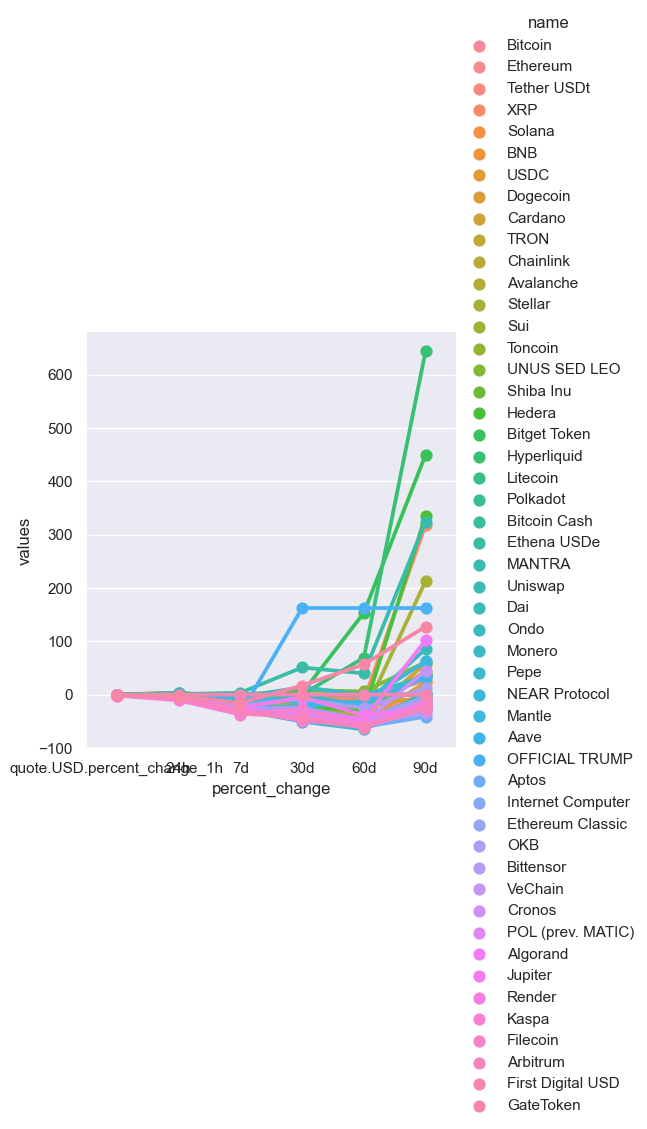

In [74]:
sns.catplot(x = 'percent_change', y = 'values', hue='name', data=df7, kind='point')

In [90]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,96553.98958,2025-02-07 00:54:57.191680
1,Ethereum,2684.87283,2025-02-07 00:54:57.191680
2,Tether USDt,1.00007,2025-02-07 00:54:57.191680
3,XRP,2.31743,2025-02-07 00:54:57.191680
4,Solana,189.13800,2025-02-07 00:54:57.191680
...,...,...,...
45,Kaspa,0.08246,2025-02-07 00:54:57.191680
46,Filecoin,3.10676,2025-02-07 00:54:57.191680
47,Arbitrum,0.44422,2025-02-07 00:54:57.191680
48,First Digital USD,0.99926,2025-02-07 00:54:57.191680


In [91]:
#to look at just bbitcoin
df10 = df10.query("name =='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,96553.98958,2025-02-07 00:54:57.191680
0,Bitcoin,96553.98958,2025-02-07 00:54:57.191680


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

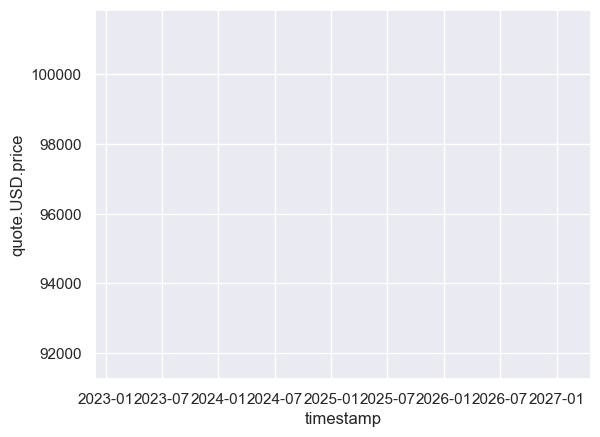

In [92]:
#visualize it
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

In [88]:
print(df10.columns)  # Check available columns


Index(['name', 'percent_change', 'values'], dtype='object')


In [89]:
print(df10.head())
print(df10.info())


      name               percent_change   values
0  Bitcoin  quote.USD.percent_change_1h  0.08410
1  Bitcoin                          24h  0.05262
2  Bitcoin                           7d -7.88873
3  Bitcoin                          30d -0.41345
4  Bitcoin                          60d -4.68203
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            6 non-null      object 
 1   percent_change  6 non-null      object 
 2   values          6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 192.0+ bytes
None
